In [1]:
pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB

In [2]:
pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.6/31.6 MB 15.0 MB/s eta 0:00:00


In [1]:
import numpy as np
import a as qtda
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from qiskit import ClassicalRegister, Aer, execute

In [17]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform

def create_vietoris_rips(points, epsilon, k):
    # Calculate the pairwise distances between points
    distances = squareform(pdist(points))
    
    # Create a dictionary to hold the simplices
    simplices = {i: [] for i in range(k+1)}
    
    # Add the 0-simplices (points) to the simplicial complex
    for i in range(len(points)):
        simplices[0].append((i,))
    
    # Add the higher-dimensional simplices to the simplicial complex
    for dim in range(1, k+1):
        for indices in itertools.combinations(range(len(points)), dim+1):
            # Check if the pairwise distances between all combinations of points
            # in the simplex are less than epsilon
            if all(distances[i][j] < epsilon for i, j in itertools.combinations(indices, 2)):
                simplices[dim].append(indices)
    
    return simplices

# Example usage
m=5
points =2*np.random.rand(m,2) # 10 random 2D points
 # maximum distance between points for an edge to be included
k = 2 # maximum simplex dimension

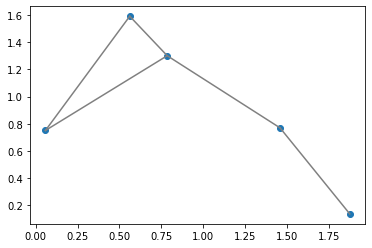

In [18]:
# Visualize the points and edges in the complex
epsilon = 1
simplices = create_vietoris_rips(points, epsilon, k)
plt.scatter(points[:,0], points[:,1])
for edge in simplices[1]:
    x = [points[i][0] for i in edge]
    y = [points[i][1] for i in edge]
    plt.plot(x, y, color='gray', linestyle='-')
plt.show()

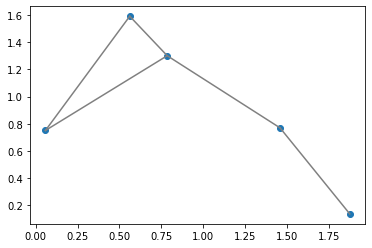

In [19]:
# Visualize the points and edges in the complex
epsilon = 1.1
simplices = create_vietoris_rips(points, epsilon, k)
plt.scatter(points[:,0], points[:,1])
for edge in simplices[1]:
    x = [points[i][0] for i in edge]
    y = [points[i][1] for i in edge]
    plt.plot(x, y, color='gray', linestyle='-')
plt.show()

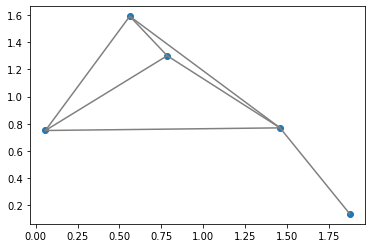

In [20]:
# Visualize the points and edges in the complex
epsilon = 1.5
simplices = create_vietoris_rips(points, epsilon, k)
plt.scatter(points[:,0], points[:,1])
for edge in simplices[1]:
    x = [points[i][0] for i in edge]
    y = [points[i][1] for i in edge]
    plt.plot(x, y, color='gray', linestyle='-')
plt.show()

In [ ]:
shots = 1000
num_eval_qubits = 5
# epsilons = [0.1, 1.1, 1.5]

data = qtda.Q_persistent_top_spectra(
    data = points,
#     distance_matrix=distance_matrix, 
    max_dimension=3, 
    max_edge_length=2, 
    num_eval_qubits=num_eval_qubits, 
    shots=shots)


Filtration scale:  0.0

Topological order:  0




Filtration scale:  0.0

Topological order:  0
Number of holes:  1.998
Dimension of the k-simplex subspace:  3
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 1.998, 3.2429343520926897: 0.114, 3.040250955086896: 0.771}


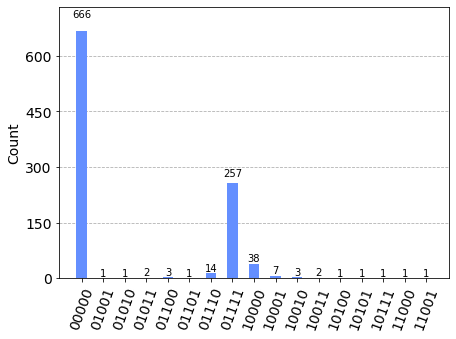



Filtration scale:  0.5873819784387285

Topological order:  0
Number of holes:  1.017
Dimension of the k-simplex subspace:  3
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 1.017, 2.026833970057931: 0.9, 3.040250955086896: 0.783, 3.2429343520926897: 0.102}


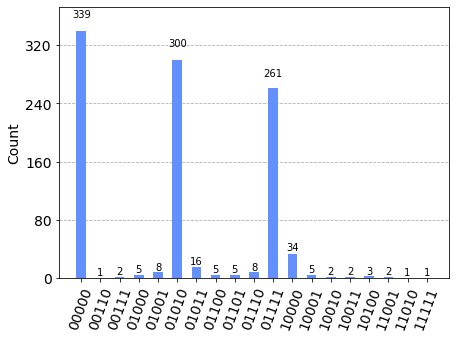


Topological order:  1
Number of holes:  0
Dimension of the k-simplex subspace:  1
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 0, 2.026833970057931: 0.882, 2.229517367063724: 0.054, 1.824150573052138: 0.022}


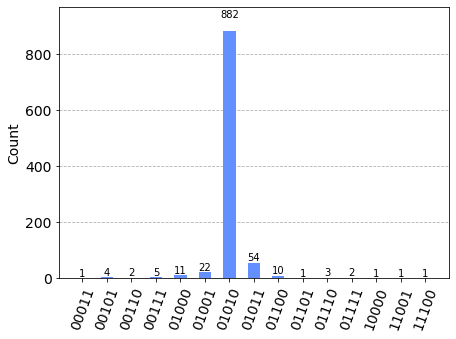



Filtration scale:  1.1067222492075481

Topological order:  0
Number of holes:  0
Dimension of the k-simplex subspace:  3
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 0, 1.0134169850289656: 1.08, 3.040250955086896: 1.5, 3.2429343520926897: 0.228}


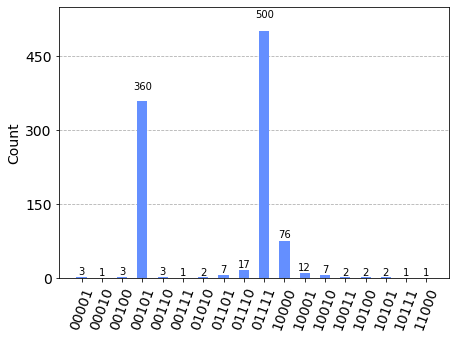


Topological order:  1
Number of holes:  0
Dimension of the k-simplex subspace:  2
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 0, 3.040250955086896: 0.786, 1.0134169850289656: 0.976, 3.2429343520926897: 0.106}


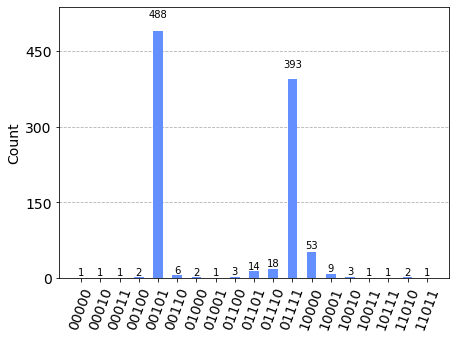



Filtration scale:  1.4158607528499931

Topological order:  0
Number of holes:  0
Dimension of the k-simplex subspace:  3
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 0, 3.040250955086896: 2.247, 3.445617749098483: 0.066, 2.8375675580811035: 0.096, 3.2429343520926897: 0.387}


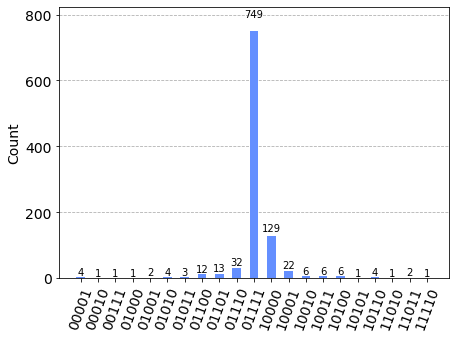


Topological order:  1
Number of holes:  0
Dimension of the k-simplex subspace:  3
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 0, 3.040250955086896: 2.295, 2.8375675580811035: 0.144, 3.2429343520926897: 0.363}


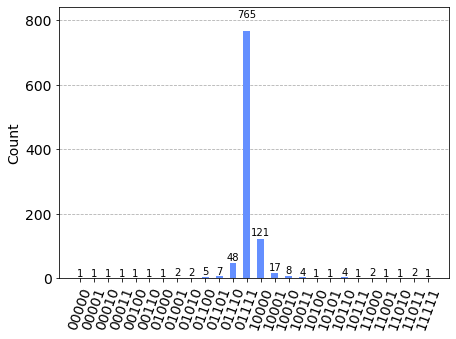


Topological order:  2
Number of holes:  0
Dimension of the k-simplex subspace:  1
Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: 
{0.0: 0, 3.040250955086896: 0.759, 3.2429343520926897: 0.119, 3.445617749098483: 0.028, 2.8375675580811035: 0.038}


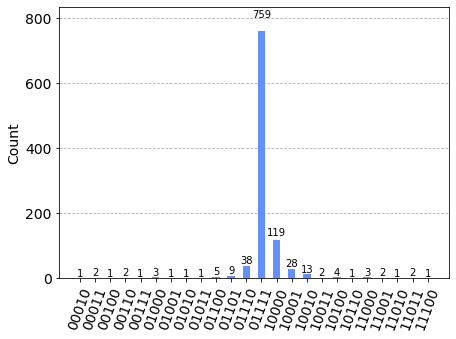

In [16]:
eigenvalue_dict = data.get_eigenvalues()

for eps in eigenvalue_dict.keys():
    print()
    print()
    print('Filtration scale: ', eps)
    for top_order in eigenvalue_dict[eps].keys():
        print()
        print('Topological order: ', top_order)
        print('Number of holes: ', eigenvalue_dict[eps][top_order][0.0])
        print('Dimension of the k-simplex subspace: ', len(data.state_dict[eps][top_order]))
        print('Eigenvalues of the combinatorial laplacian with dimension of corresponding eigenspaces: ')
        print(eigenvalue_dict[eps][top_order])
        display(plot_histogram(data.get_counts()[eps][top_order]))